# Read Data

In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
project_path = './'
# project_path = '/content/drive/My Drive/assignments/' # For google drive

In [4]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Read the input file and check the data dimension

In [5]:
# reading the CSV file into pandas dataframe
germanCredit = pd.read_csv(project_path + "german_credit.csv") 
print(germanCredit.shape)

(1000, 21)


In [6]:
germanCredit.sample(10)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
182,1,< 0 DM,21,all credits at this bank paid back duly,car (new),1647,unknown/ no savings account,1 <= ... < 4 years,4,male : single,none,2,if not A121 : building society savings agreeme...,40,none,own,2,unskilled - resident,2,none,yes
59,1,< 0 DM,36,critical account/ other credits existing (not ...,radio/television,6229,... < 100 DM,... < 1 year,4,female : divorced/separated/married,co-applicant,4,unknown / no property,23,none,rent,2,unskilled - resident,1,"yes, registered under the customers name",yes
689,0,< 0 DM,12,existing credits paid back duly till now,car (new),3651,.. >= 1000 DM,1 <= ... < 4 years,1,male : single,none,3,if not A121 : building society savings agreeme...,31,none,own,1,skilled employee / official,2,none,yes
715,0,no checking account,30,critical account/ other credits existing (not ...,car (used),7596,unknown/ no savings account,.. >= 7 years,1,male : single,none,4,"if not A121/A122 : car or other, not in attrib...",63,none,own,2,skilled employee / official,1,none,yes
329,0,0 <= ... < 200 DM,6,existing credits paid back duly till now,domestic appliances,1068,... < 100 DM,.. >= 7 years,4,male : single,none,4,"if not A121/A122 : car or other, not in attrib...",28,none,own,1,skilled employee / official,2,none,yes
811,0,0 <= ... < 200 DM,6,existing credits paid back duly till now,domestic appliances,484,... < 100 DM,4 <= ... < 7 years,3,male : married/widowed,guarantor,3,real estate,28,bank,own,1,unskilled - resident,1,none,yes
538,1,< 0 DM,48,existing credits paid back duly till now,car (new),7763,... < 100 DM,.. >= 7 years,4,male : single,none,4,unknown / no property,42,bank,for free,1,management/ self-employed/ highly qualified em...,1,none,yes
33,0,no checking account,12,critical account/ other credits existing (not ...,business,1264,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,unknown / no property,57,none,rent,1,unskilled - resident,1,none,yes
75,0,< 0 DM,12,critical account/ other credits existing (not ...,car (used),1526,... < 100 DM,.. >= 7 years,4,male : single,none,4,unknown / no property,66,none,for free,2,management/ self-employed/ highly qualified em...,1,none,yes
20,0,no checking account,9,critical account/ other credits existing (not ...,car (new),2134,... < 100 DM,1 <= ... < 4 years,4,male : single,none,4,"if not A121/A122 : car or other, not in attrib...",48,none,own,3,skilled employee / official,1,"yes, registered under the customers name",yes


In [7]:
germanCredit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

# Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [8]:
X = germanCredit # Take full dataset as X
y = pd.DataFrame(np.random.randint(0, 1000, size=(1000, 1)), columns=['A']) # Build a dummy dataframe as Y
# Use X and y as the new test train split to get the 50% of data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1)

In [9]:
# Lets build a Ensemble model but need to modify the dataset first
splitData = X_train
splitData

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
789,1,< 0 DM,40,critical account/ other credits existing (not ...,(vacation - does not exist?),5998,... < 100 DM,1 <= ... < 4 years,4,male : single,none,3,unknown / no property,27,bank,own,1,skilled employee / official,1,"yes, registered under the customers name",yes
179,0,< 0 DM,21,critical account/ other credits existing (not ...,car (new),571,... < 100 DM,.. >= 7 years,4,male : single,none,4,real estate,65,none,own,2,skilled employee / official,1,none,yes
27,0,>= 200 DM / salary assignments for at least 1 ...,12,all credits at this bank paid back duly,domestic appliances,409,.. >= 1000 DM,1 <= ... < 4 years,3,female : divorced/separated/married,none,3,real estate,42,none,rent,2,skilled employee / official,1,none,yes
33,0,no checking account,12,critical account/ other credits existing (not ...,business,1264,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,unknown / no property,57,none,rent,1,unskilled - resident,1,none,yes
334,1,< 0 DM,24,no credits taken/ all credits paid back duly,radio/television,4110,... < 100 DM,.. >= 7 years,3,male : single,none,4,unknown / no property,23,bank,rent,2,skilled employee / official,2,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,0,no checking account,10,existing credits paid back duly till now,car (used),2901,unknown/ no savings account,... < 1 year,1,female : divorced/separated/married,none,4,real estate,31,none,rent,1,skilled employee / official,1,none,yes
72,0,< 0 DM,8,critical account/ other credits existing (not ...,furniture/equipment,1164,... < 100 DM,.. >= 7 years,3,male : single,none,4,unknown / no property,51,bank,for free,2,management/ self-employed/ highly qualified em...,2,"yes, registered under the customers name",yes
908,0,no checking account,15,delay in paying off in the past,car (used),3594,... < 100 DM,... < 1 year,1,female : divorced/separated/married,none,2,if not A121 : building society savings agreeme...,46,none,own,2,unskilled - resident,1,none,yes
235,1,< 0 DM,24,existing credits paid back duly till now,domestic appliances,1823,... < 100 DM,unemployed,4,male : single,none,2,"if not A121/A122 : car or other, not in attrib...",30,stores,own,1,management/ self-employed/ highly qualified em...,2,none,yes


# Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [10]:
# Print Shape of model data
splitData.shape

(500, 21)

In [11]:
splitData = pd.get_dummies(splitData, prefix_sep='_', drop_first=True)

### Check for highly correlated variables but don't required any treatment for this use case

In [12]:
splitData.corr()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,account_check_status_no checking account,credit_history_critical account/ other credits existing (not at this bank),credit_history_delay in paying off in the past,credit_history_existing credits paid back duly till now,credit_history_no credits taken/ all credits paid back duly,purpose_business,purpose_car (new),purpose_car (used),purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/television,purpose_repairs,purpose_retraining,savings_... < 100 DM,savings_100 <= ... < 500 DM,savings_500 <= ... < 1000 DM,savings_unknown/ no savings account,present_emp_since_... < 1 year,present_emp_since_1 <= ... < 4 years,present_emp_since_4 <= ... < 7 years,present_emp_since_unemployed,personal_status_sex_male : divorced/separated,personal_status_sex_male : married/widowed,personal_status_sex_male : single,other_debtors_guarantor,other_debtors_none,"property_if not A121/A122 : car or other, not in attribute 6",property_real estate,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,"telephone_yes, registered under the customers name",foreign_worker_yes
default,1.000000,0.154395,0.102781,0.130897,-0.004657,-0.135853,-0.047948,0.005908,0.266244,-0.037275,-0.332447,-0.215080,-0.013008,0.081228,0.159669,0.024186,0.138695,-0.147745,-0.117847,0.017339,0.017339,0.025969,0.066722,-0.012017,0.165728,0.057746,-0.060505,-0.147254,0.140237,-0.002490,-0.096967,-0.017355,0.055243,-0.054198,-0.079098,-0.041063,-0.015518,0.018252,-0.098639,0.059045,-0.132951,0.074202,-0.083858,0.095812,-0.004743,-0.006760,0.014965,-0.066688,0.071374
duration_in_month,0.154395,1.000000,0.621934,0.121678,-0.009039,-0.054504,-0.078458,-0.057544,-0.038817,-0.038696,-0.069243,-0.061656,0.152454,-0.109452,0.103747,0.145638,-0.143347,0.149909,-0.044913,0.048706,0.070248,-0.058096,-0.032850,-0.083273,-0.043301,0.039835,-0.017826,0.052780,-0.069240,0.000759,0.020502,0.013600,-0.000548,-0.116337,0.146441,-0.057392,0.025609,0.143219,-0.245338,0.217272,-0.049515,0.071134,-0.038749,-0.118875,0.011255,-0.034287,-0.186423,0.185221,0.127211
credit_amount,0.102781,0.621934,1.000000,-0.215371,0.038010,0.058086,-0.021106,0.019018,-0.082235,-0.088007,-0.003059,0.003212,0.149106,-0.141036,0.139455,0.068353,-0.041129,0.274033,-0.200087,-0.000159,0.191737,-0.062536,-0.083850,-0.071556,-0.041113,-0.032013,-0.060907,0.140704,-0.082717,0.003567,0.000449,0.058394,-0.001216,-0.166489,0.190200,-0.087920,0.030212,0.086191,-0.269928,0.262210,-0.078692,0.069622,-0.109663,-0.072627,-0.125468,-0.076678,-0.172477,0.318831,0.062949
installment_as_income_perc,0.130897,0.121678,-0.215371,1.000000,0.028310,0.042569,0.017900,-0.088701,0.054283,-0.041112,0.001080,0.025395,-0.021834,0.001826,-0.068862,-0.017305,-0.044468,-0.124474,0.197629,0.052040,-0.047165,-0.081683,0.069441,-0.013254,-0.016842,0.003071,0.009483,-0.009576,-0.018426,-0.095400,0.017109,-0.009532,-0.081023,0.011870,0.115087,0.025501,-0.031047,0.026716,-0.008171,0.053351,0.023710,-0.002092,0.029932,-0.050538,0.021447,-0.066777,-0.040887,-0.009868,0.039202
present_res_since,-0.004657,-0.009039,0.038010,0.028310,1.000000,0.273547,0.064556,0.057483,0.030969,-0.035688,0.042594,0.125258,0.007006,-0.121130,-0.013035,-0.009598,0.014127,0.111287,-0.092582,0.031423,0.031423,-0.012800,-0.031976,0.011691,-0.132035,0.051293,0.038868,0.110245,-0.153654,-0.158631,-0.038974,0.155625,-0.004792,-0.111019,0.043533,-0.011392,-0.025441,-0.050115,-0.091232,0.211310,0.028583,-0.084003,-0.256385,0.110245,-0.005186,0.047173,0.015645,0.065494,0.087317
age,-0.135853,-0.054504,0.058086,0.042569,0.273547,1.000000,0.142372,0.097632,-0.008085,0.051976,0.0499

duration_in_month and credit_amount are highly coorelated.

### Drop the original variables which are converted to dummy

In [13]:
splitData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 789 to 37
Data columns (total 49 columns):
 #   Column                                                                      Non-Null Count  Dtype
---  ------                                                                      --------------  -----
 0   default                                                                     500 non-null    int64
 1   duration_in_month                                                           500 non-null    int64
 2   credit_amount                                                               500 non-null    int64
 3   installment_as_income_perc                                                  500 non-null    int64
 4   present_res_since                                                           500 non-null    int64
 5   age                                                                         500 non-null    int64
 6   credits_this_bank                                                

# Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [14]:
X = splitData.drop(columns=['default'])
y = splitData['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

# Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [15]:
rf = RandomForestClassifier(n_jobs=2, n_estimators=500,criterion='entropy', random_state=9999)
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
                       oob_score=False, random_state=9999, verbose=0,
                       warm_start=False)

In [16]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
                       oob_score=False, random_state=9999, verbose=0,
                       warm_start=False)

In [17]:
predicted = rf.predict(X_test)
predicted

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0])

# Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [18]:
confusion_matrix(y_test,predicted)

array([[94, 10],
       [32, 14]])

In [19]:
rf.score(X_test, y_test)

0.72

# Q6 Show the list of the features importance( 1 Marks)

In [20]:
rf.feature_importances_

array([0.07213023, 0.11231644, 0.05028108, 0.03615518, 0.09832752,
       0.02179012, 0.01320622, 0.03217028, 0.00985129, 0.04966247,
       0.02529308, 0.01158436, 0.01890292, 0.0127114 , 0.00699105,
       0.02703893, 0.01409641, 0.01649487, 0.00471909, 0.00294281,
       0.01424142, 0.00261471, 0.00132549, 0.01874718, 0.01504449,
       0.00720974, 0.01464792, 0.02143165, 0.02037767, 0.01529223,
       0.00870228, 0.00421421, 0.00920676, 0.0188882 , 0.01159395,
       0.01445825, 0.01626494, 0.01963044, 0.01231596, 0.02285625,
       0.00909309, 0.01398297, 0.01119787, 0.02058384, 0.00125211,
       0.01241236, 0.02073934, 0.00500892])

# Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [29]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

In [23]:
# Use below values
num_folds = 10
seed = 77

In [24]:
#Validate the Random Forest model build above using k fold
# prepare cross validation
kfold = KFold(n_splits=num_folds)
# enumerate splits
for train, test in kfold.split(X_train, y_train):
	print('train: %s, test: %s' % (train, test))

train: [ 35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250
 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268
 269 270 271 272 273 274 275 276 277 278 279

In [25]:
#Calculate Mean score
scores = cross_val_score(rf, X, y, cv=kfold)
scores
avg_score = np.mean(scores)
print('Average score', avg_score)

Average score 0.764


In [26]:
# Calculate score standard deviation using std()
stdDeviation = np.std(scores)
print('Standard Deviation', stdDeviation)

Standard Deviation 0.06499230723708765


# Q8 Print the confusion matrix( 1 Marks)

In [34]:
conf_matrix = confusion_matrix(y_test, predicted) #Print the confusion matrix of RandomForest classifier.
conf_matrix

array([[94, 10],
       [32, 14]])

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [42]:
print('Recall', conf_matrix[0][0]/ (conf_matrix[0][0] + conf_matrix[1][0]))

Recall 0.746031746031746


In [41]:
print('Precision', conf_matrix[0][0]/ (conf_matrix[0][0] + conf_matrix[0][1]))

Precision 0.9038461538461539


# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [45]:
#Hint: Use roc_curve
from sklearn.metrics import roc_curve, auc, plot_roc_curve

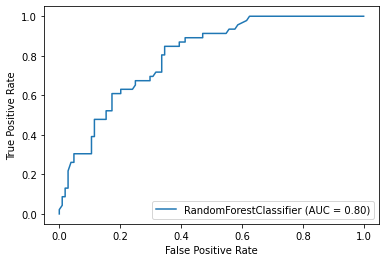

In [46]:
plot_roc_curve(rf, X_test, y_test)
plt.show()   

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [56]:
fper, tper, thresholds = roc_curve(y_test.values, predicted)

In [57]:
print('AUC', auc(fper, tper))

AUC 0.6040969899665551


### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [ ]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [ ]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [ ]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.6893333333333334
Standard deviation:  0.014966629547095768
